<a href="https://colab.research.google.com/github/yoohw0317/DAPproject/blob/main/DAP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
from wordcloud import WordCloud 

In [2]:
df = pd.read_excel("https://github.com/yoohw0317/DAPproject/blob/main/data.xlsx?raw=true")
df = df[['score', 'review']]
df.dropna
df

,score,review
0,5,11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다....
1,2,숙박 바우처가 생겨서 11월 24일 투숙을 했습니다.일이 생겨서 저녁 7시쯤 늦게 ...
2,5,모든것이 좋았습니다.다만 욕조 물빠지는 소리가 좀 거슬리긴 했어요그거 외에는 인생에...
3,5,"엄마랑 처음 호캉스 간거엿는데 호텔 입구부터 직원분들의 친절함, 그리고 객실 상태 ..."
4,5,결혼 후에 특별한 숙박을 위해 방문했습니다. 최고의 서비스와 시설들로 매우 만족스러...
...,...,...
428,5,"우리는 2박을 묵었는데 서명인 서울. 대부분의 택시 기사가 호텔을 모르는 서명인, ..."
429,5,"우리는 두 개의 절대적으로 환상적인, 잊을 수 없는 일을 서명인. 도착했을 때, 우..."
430,5,다음에도 꼭 이곳에 다시 올 걸지 사용자_이름:. 방에 도착했을 때 제공된 웰컴 드...
431,5,76 층 로비. 시작할 수 있습니다. 룸 92 차 바닥. 환상적인 전망이 다. 매우...


In [3]:
def regularExpression (text):
  exp = re.compile('[^ 가-힣]').sub('', text);
  return exp

해당 test에 한글을 제외한 모든 것들이 걸러지는지 시험하기 위해 한국어를 제외한 대부분의 모든 것들을 넣어줍니다.

1. 숫자

2. ㅠㅠ ㅋㅋ와 같은 이모티콘

3. .,!와 같은 기호

4. 하트, 별과 같은 이모티콘

발표때 지우겠다고 말 했는데 일부로 안지웠습니다. 생각해보니 제일 좋은 예제인 것 같아서... 그래도 기억에선 지워주세요

In [4]:
test='12월 15일에 테스트 해봅니당...ㅠㅠㅠㅠ 제발 성공하기를 흑ㅠㅠㅠㅠㅠㅠㅠㅠㅎㅎㅎㅎㅎㅎ, plz plz success...!!!!! 다 지워져라 얍★'
regularExpression(test)

'월 일에 테스트 해봅니당 제발 성공하기를 흑    다 지워져라 얍'

해당 환경설정은 사용자에 맞는 환경설정을 사용해야합니다.

그렇지 않으면 상상치도 못한 오류에 직면하게 될 수도 있습니다.

코드 작성자의 환경은 다음과 같습니다.

Python 3.8.8

java 17.0.1 2021-10-19 LTS

Java(TM) SE Runtime Environment (build 17.0.1+12-LTS-39)

Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)

JPype1-1.3.0-cp38-cp38-win_amd64.whl



In [ ]:
!apt-get update 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

In [6]:
from konlpy.tag import Okt
from collections import Counter

만약 에러가 발생한다면 해당 코드에 들어가서 에러가 나는 부분을 지워주면 정상 실행될 때도 있습니다.


이게 무슨소린가 싶겠지만 직접 해본사람은 이해할 수 있습니다.

In [7]:
test = regularExpression(df['review'][0])
test
okt = Okt()
testnouns = okt.nouns(test)
testnouns #정상 추출 확인!

['일', '숙박', '그', '시간', '일', '분', '조만간', '다시', '예약', '가족', '또', '해']

말뭉치를 생성하고 분석해봅니다. 위에서 사용했던 것을 반복하는 것입니다.

In [8]:
totalCorpus = "".join(df['review'].tolist())
totalCorpus[:40]

'11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 '

In [9]:
totalCorpus = regularExpression(totalCorpus)
totalCorpus[:40]

'일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다조만간'

In [10]:
nouns = okt.nouns(totalCorpus)
print(nouns[:20])

['일', '숙박', '그', '시간', '일', '분', '조만간', '다시', '예약', '가족', '또', '해', '숙박', '바', '처가', '월', '일', '투숙', '일이', '저녁']


In [11]:
totalcount_notFiltered = Counter(nouns)
print(totalcount_notFiltered.most_common(20))

[('호텔', 355), ('직원', 291), ('서비스', 285), ('니엘', 201), ('객실', 178), ('것', 177), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('층', 129), ('시설', 127), ('라운지', 126), ('체크', 124), ('수', 124), ('시간', 95), ('룸', 95), ('서울', 95), ('때', 85)]


https://www.ranks.nl/stopwords/korean

불용어 사전 링크를 참고해서 엑셀로 정리하여 사용

In [12]:
stopWords = pd.read_excel('https://github.com/yoohw0317/DAPproject/blob/main/stopwords.xlsx?raw=true').values.tolist()

In [13]:
filteredNouns = [x for x in nouns if [x] not in stopWords]
totalCount = Counter(filteredNouns)
print(totalCount.most_common(20))

[('직원', 291), ('서비스', 285), ('객실', 178), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('층', 129), ('시설', 127), ('라운지', 126), ('체크', 124), ('수', 124), ('룸', 95), ('조식', 84), ('투숙', 77), ('전망', 69), ('다시', 67), ('생각', 64), ('곳', 63)]


**뷰, 룸, 방**을 제외하고는 한 글자가 의미가 없어보이죠? filter 다시 해봅시다 

이번에는 뷰, 룸, 방을 제외한 한 글자는 모두 사라지도록 해봅시다.


In [14]:
filteredNouns = [x for x in filteredNouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
totalCount = Counter(filteredNouns)
print(filteredNouns[:20])
print(totalCount.most_common(20))

['숙박', '조만간', '다시', '예약', '가족', '숙박', '처가', '투숙', '일이', '저녁', '체크', '체크', '추가', '한강', '뷰', '변경', '프리미어', '더블', '룸', '업그레이드']
[('직원', 291), ('서비스', 285), ('객실', 178), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('시설', 127), ('라운지', 126), ('체크', 124), ('룸', 95), ('조식', 84), ('투숙', 77), ('전망', 69), ('다시', 67), ('생각', 64), ('매우', 58), ('기분', 56), ('수영장', 55)]


이 과정을 함수로 표현합니다.

corpusToNouns는 아래에서 BOW를 사용할 때 사용됩니다.

그리고 해당 함수들은 모두 최적화가 진행된 Hayatt 분석 모델에서 사용됩니다.

자세한 내용은 DAP_project(Hayatt).ipynb를 참조해주세요

In [15]:
def corpusToNounsCounter (text):
  text = regularExpression(text)
  nouns = okt.nouns(text)
  nouns = [x for x in nouns if [x] not in stopWords]
  nouns = [x for x in nouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
  nouns_counter = Counter(nouns)
  return nouns_counter

def corpusToNouns (text):
  text = regularExpression(text)
  nouns = okt.nouns(text)
  nouns = [x for x in nouns if [x] not in stopWords]
  nouns = [x for x in nouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
  return nouns

그래프에 사용할 폰트를 업로드합니다.

폰트는 한글이 지원되는 폰트면 무엇이든 가능합니다.

대신 폰트의 이름은 'this'로 고정해주세요 (확장자가 포함된다면 this.ttf)


In [ ]:
from google.colab import files
files.upload()

여기까지 사실 필요한 데이터는 대부분 뽑은거죠.


이제 데이터를 이용해서 호텔의 리뷰를 분석해봅시다.


우선적으로 아래에 있는 코드 2줄은 한글 폰트를 적용하는 변수 이름입니다.



In [17]:
font_label=fm.FontProperties(fname='/content/this.ttf', size=20)
font_title=fm.FontProperties(fname='/content/this.ttf', size=30)
font_xticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_yticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_bar=fm.FontProperties(fname='/content/this.ttf', size=15)

파싱된 명사의 개수는 중복을 포함해서 10317개로 단어에 대한 비율이 너무 작게 나타날 우려가 존재합니다.

그래서 상위 50위의 단어들을 파악해봅시다.


In [18]:
sum(totalCount.values())

10317

In [19]:
top50 = totalCount.most_common(50)
x = [x for (x, y) in top50]
y = [y for (x, y) in top50]
colors_top50 = sns.color_palette('Spectral', 50)

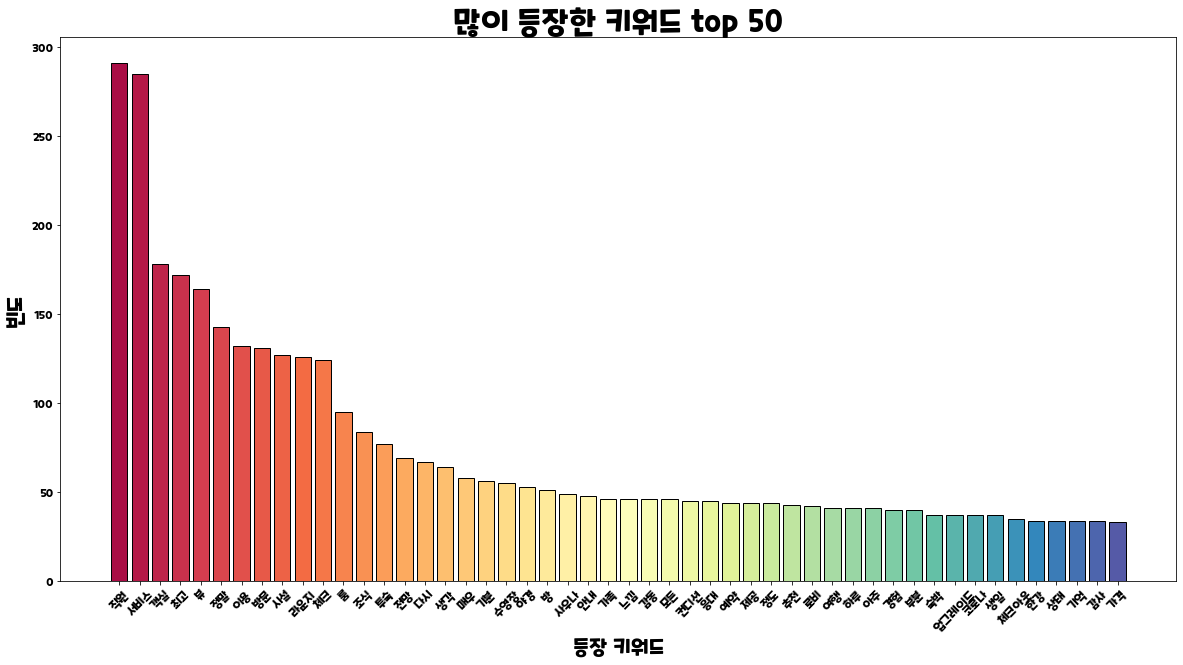

In [20]:
plt.figure(figsize = (20, 10))
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

워드클라우드 분석은 일부로 전체 단어를 놓고 했습니다.

어차피 워드클라우드에서 너무 많다고 여겨지면 알아서 컷 해줍니다.

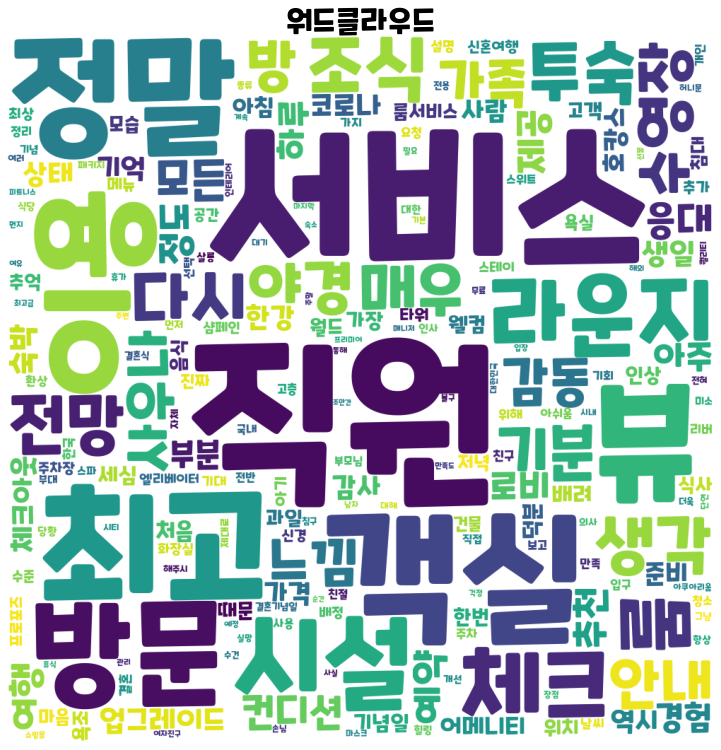

In [21]:
wordCloud = WordCloud(max_font_size=250, font_path='/content/this.ttf', background_color='white', width=1000, height=1000).generate_from_frequencies(totalCount)
plt.figure(figsize=(13, 13))
plt.imshow(wordCloud)
plt.title("워드클라우드", fontproperties=font_title)
plt.axis('off')
plt.show()

 점수별 분포와 점수에 따른 단어 빈도수 체크




In [22]:
rating = Counter(df['score'])
rating = sorted(rating.items())
rating

[(1, 4), (2, 6), (3, 9), (4, 38), (5, 376)]

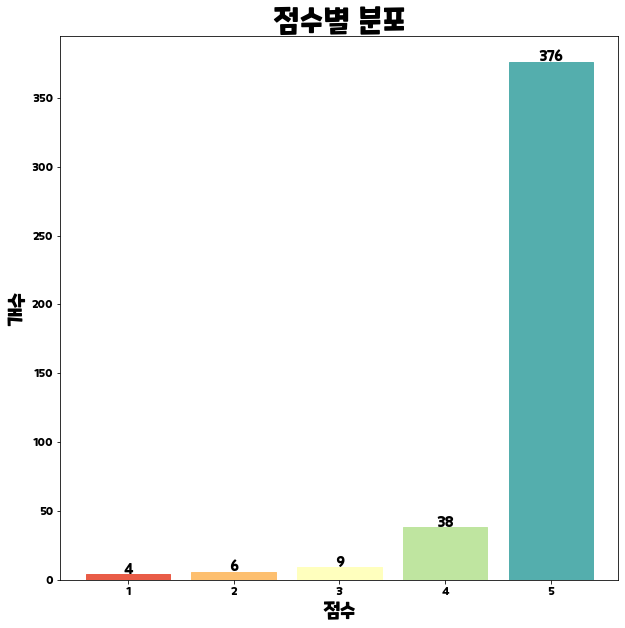

In [23]:
colors_rating = sns.color_palette('Spectral', 5)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
x = [x for (x, y) in rating]
y = [y for (x, y) in rating]
bars = plt.bar(x, y, color=colors_rating, edgecolor=colors_rating)

barText_rating = y
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width() * (1/2), b.get_height()+0.2, barText_rating[i], ha='center', fontsize=13, fontproperties=font_bar)

plt.xlabel("점수",fontproperties=font_label)
plt.ylabel("개수",fontproperties=font_label)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)
plt.title("점수별 분포",fontproperties=font_title)
plt.show()

선호 리뷰와 비선호 리뷰를 분석해봅시다.

In [24]:
likes =  df[df['score']>3]
dislikes = df[df['score'] <= 3]
likesCorpus = "".join(likes['review'])
likesNouns = corpusToNounsCounter("".join(likesCorpus))
dislikesCorpus = "".join(dislikes['review'])
dislikesNouns = corpusToNounsCounter("".join(dislikesCorpus))

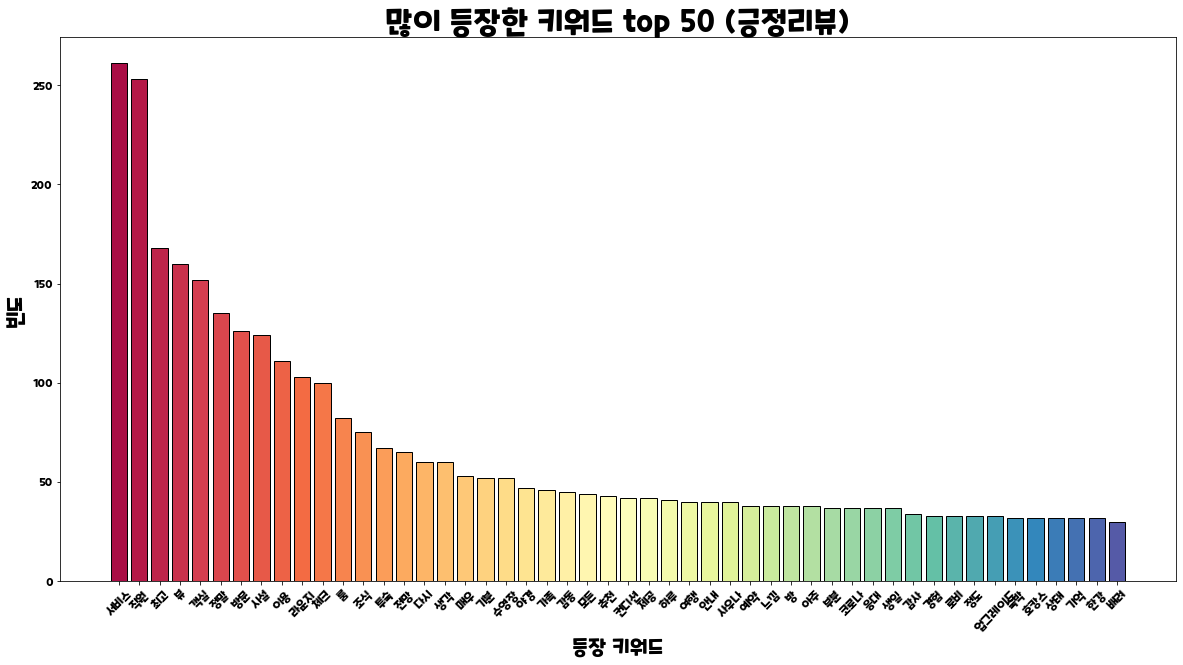

In [25]:
likes_top50 = likesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in likes_top50]
y = [y for (x, y) in likes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (긍정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

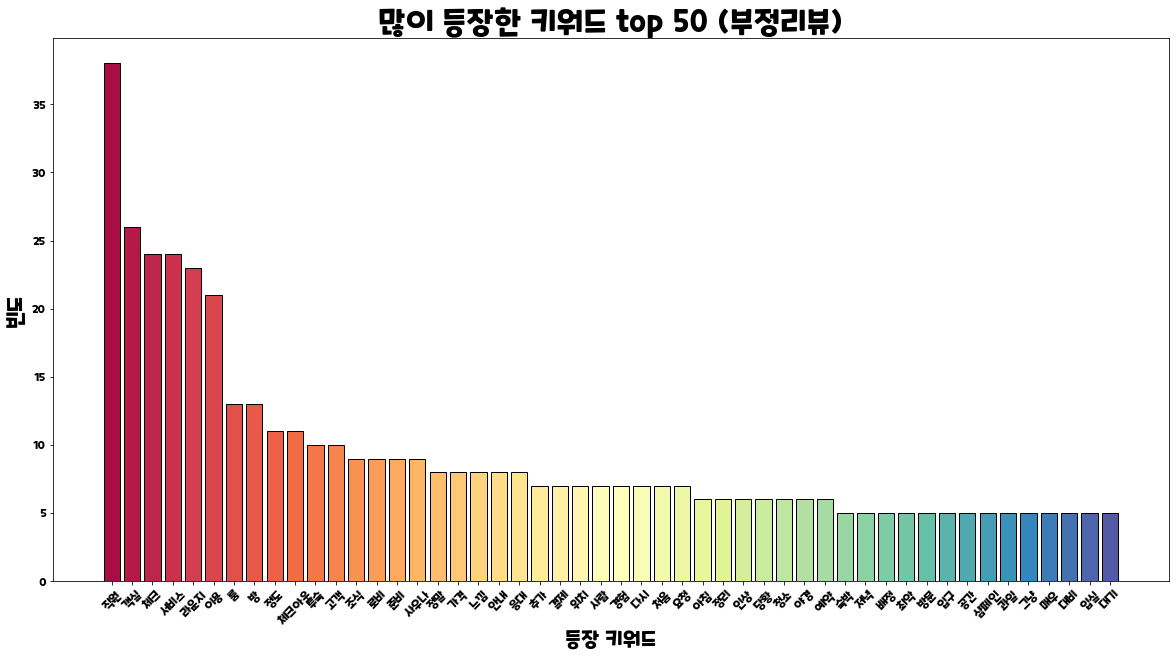

In [26]:
dislikes_top50 = dislikesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in dislikes_top50]
y = [y for (x, y) in dislikes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (부정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

단순히 이거로만 본다면 직원과 객실, 서비스가 부정적인 것으로 보여집니다.

하지만 해당 단어는 긍정적인 리뷰에서도 많이 볼 수 있기 때문에 직원, 객실에 대한 평가가 부정적인지 확신할 수 없습니다.

여기서 정상적인 감성 분석을 위해 TF-IDF 모델을 사용합니다.

우선적으로 bag of Words 벡터를 생성해 봅시다.


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vect =  CountVectorizer(tokenizer = corpusToNouns)
reviewList = df['review'].tolist()
bow_vect = vect.fit_transform(reviewList)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
print(word_list[:20])
print(count_list[:20])
bow_vect.shape

['가게', '가격', '가구', '가기', '가까이', '가끔', '가나', '가능', '가능성', '가도', '가드', '가득', '가라', '가량', '가루', '가면', '가방', '가성', '가슴', '가습기']
[ 5 33  2  7  1  4  1  1  1  2  2  1  2  2  2  5  1  2  3  1]


(433, 2161)

In [30]:
word_count_dict = dict(zip(word_list, count_list))

boW 벡터와 관련하여 TF-IDF 변환을 진행합니다.

여기서 정상적인 가중치를 설정해줄 것입니다.

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [32]:
print(tf_idf_vect.shape)
print(tf_idf_vect[0])

(433, 2161)
  (0, 1629)	0.577564273266136
  (0, 1271)	0.4224803374964787
  (0, 1024)	0.4258910136134034
  (0, 343)	0.3689872063577225
  (0, 28)	0.41278948720030717


위에서 나누어준 likes 와 dislikes를 가지고 Training을 해봅시다.

In [33]:
def likeDislike(score):
  if score >= 4:
    return 1
  else:
    return 0

In [34]:
import copy
df_test = copy.deepcopy(df)
df_test['likeDislike'] = df_test['score'].apply(likeDislike)
df_test

,score,review,likeDislike
0,5,11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다....,1
1,2,숙박 바우처가 생겨서 11월 24일 투숙을 했습니다.일이 생겨서 저녁 7시쯤 늦게 ...,0
2,5,모든것이 좋았습니다.다만 욕조 물빠지는 소리가 좀 거슬리긴 했어요그거 외에는 인생에...,1
3,5,"엄마랑 처음 호캉스 간거엿는데 호텔 입구부터 직원분들의 친절함, 그리고 객실 상태 ...",1
4,5,결혼 후에 특별한 숙박을 위해 방문했습니다. 최고의 서비스와 시설들로 매우 만족스러...,1
...,...,...,...
428,5,"우리는 2박을 묵었는데 서명인 서울. 대부분의 택시 기사가 호텔을 모르는 서명인, ...",1
429,5,"우리는 두 개의 절대적으로 환상적인, 잊을 수 없는 일을 서명인. 도착했을 때, 우...",1
430,5,다음에도 꼭 이곳에 다시 올 걸지 사용자_이름:. 방에 도착했을 때 제공된 웰컴 드...,1
431,5,76 층 로비. 시작할 수 있습니다. 룸 92 차 바닥. 환상적인 전망이 다. 매우...,1


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [36]:
x = tf_idf_vect
y = df_test['likeDislike']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
logi = LogisticRegression(random_state = 0)
logi.fit(x_train, y_train)
y_pred = logi.predict(x_test)

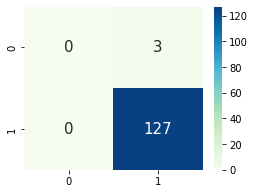

accurancy:  0.9769230769230769
precision:  0.9769230769230769
recall:  1.0
F1:  0.9883268482490272


In [37]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

sampling을 통해 두 샘플의 개수를 맞춘 다음 다시 시도해봅시다.

부정리뷰가 너무 적어서 학습이 잘 되지 않을 가능성이 높습니다.

In [38]:
val_count = df_test['likeDislike'].value_counts().to_list

In [39]:
positiveRandom = df_test[df_test['likeDislike'] == 1].sample(19, random_state = 20).index.tolist()
negativeRandom = df_test[df_test['likeDislike'] == 0].sample(19, random_state = 12).index.tolist()

In [40]:
random = positiveRandom + negativeRandom
x = tf_idf_vect[random]
y = df_test['likeDislike'][random]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
logi2 = LogisticRegression(random_state = 0)
logi2.fit (x_train, y_train)
y_predict = logi2.predict(x_test)

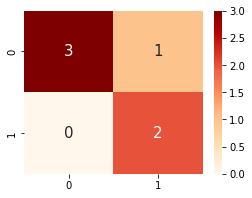

accurancy:  0.8333333333333334
precision:  0.6666666666666666
recall:  1.0
F1:  0.8


In [41]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_predict)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15 }, cmap='OrRd', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_predict))
print('precision: ', precision_score(y_test, y_predict))
print('recall: ', recall_score(y_test, y_predict))
print('F1: ', f1_score(y_test, y_predict))

긍정과 부정을 구분할 수 있게 됐습니다.

이제 긍정적으로 분석한 단어가 무엇인지, 부정적으로 분석한 단어가 무엇인지 가중치를 통해 살펴봅시다.

수가 양수로 크게 증가할 수록 긍정의 영향을 많이 미쳤다는 뜻이고, 음수로 더 작게 감소할 수록 부정의 영향을 많이 미쳤음을 의미합니다.

(array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3]),
 <a list of 8 Text major ticklabel objects>)

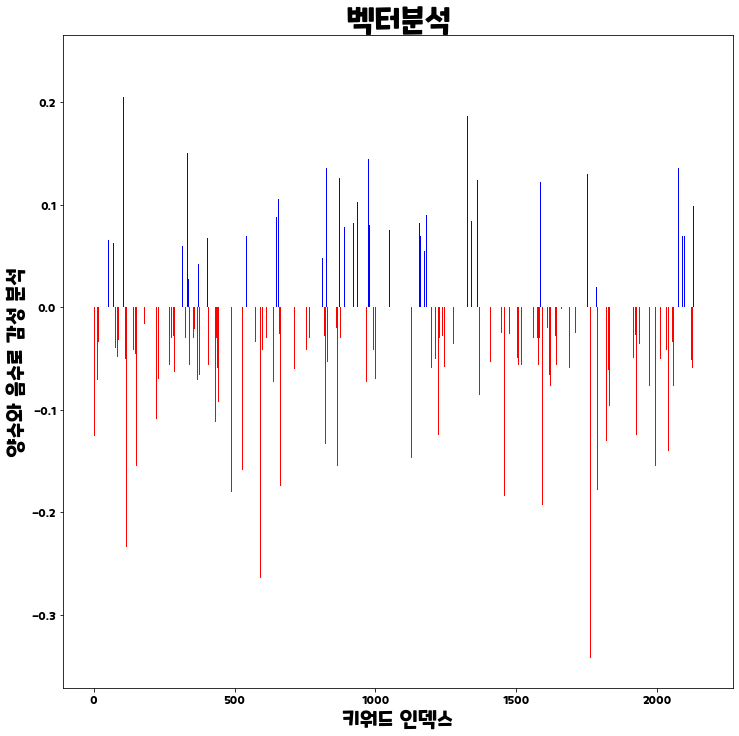

In [47]:
color = pd.DataFrame(columns = {'positive'})
color['positive'] = logi2.coef_[0] > 0
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize= (12, 12))
plt.bar(range(len(logi2.coef_[0])), logi2.coef_[0], color = color.positive.map({True: 'b', False: 'r'}))
plt.xlabel("키워드 인덱스",fontproperties=font_label)
plt.ylabel("양수와 음수로 감성 분석",fontproperties=font_label)
plt.title("벡터분석",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)

In [43]:
pos_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = True)
neg_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = False)

In [44]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}

가중치 그래프는 다음과 같습니다.

부정리뷰 그래프의 경우 형평성을 위해 절대값으로 설정하고 그래프를 그렸습니다.

긍정적인 단어와 부정적인 단어가 잘 구분되지 않은 것 같은 데, 2가지 이유를 추측할 수 있습니다.

1. 학습 데이터가 너무 적었다. -> 이건 파크 하얏트 분석을 통해 잘 되었음을 확인할 수 있습니다.

2. 복합리뷰 존재, 리뷰를 보면 OO는 좋았는데 XX는 싫었다와 같은 복합 리뷰가 많습니다. 이 경우 복합적인 감정을 어느 하나로 편향시키는 바람에 이와 같은 분석 결과가 발생할 수 있습니다.


더 정확한 분석을 보시려면 DAP_project(Hayatt).ipynb를 참조해주세요

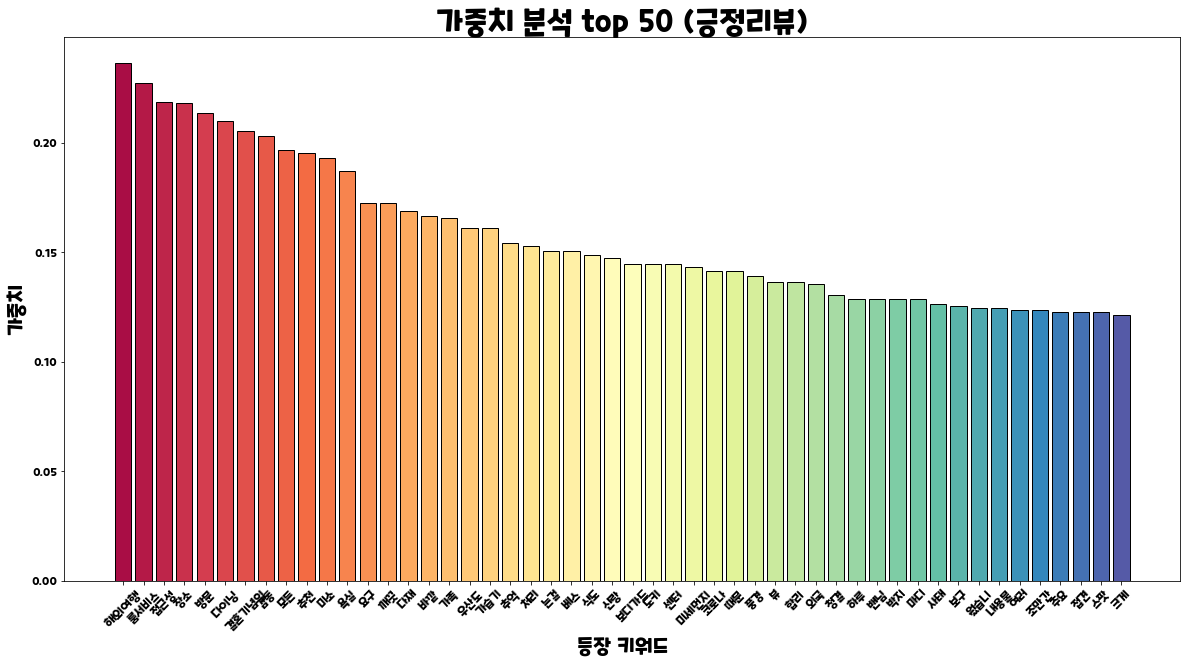

In [45]:
likes_tfidf50 = []
count = 0
for x in pos_index[:50]:
  likes_tfidf50.append((invert_index_vectorizer[x[1]], x[0]))
plt.figure(figsize = (20, 10))
x = [x for (x, y) in likes_tfidf50]
y = [y for (x, y) in likes_tfidf50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("가중치",fontproperties=font_label)
plt.title("가중치 분석 top 50 (긍정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

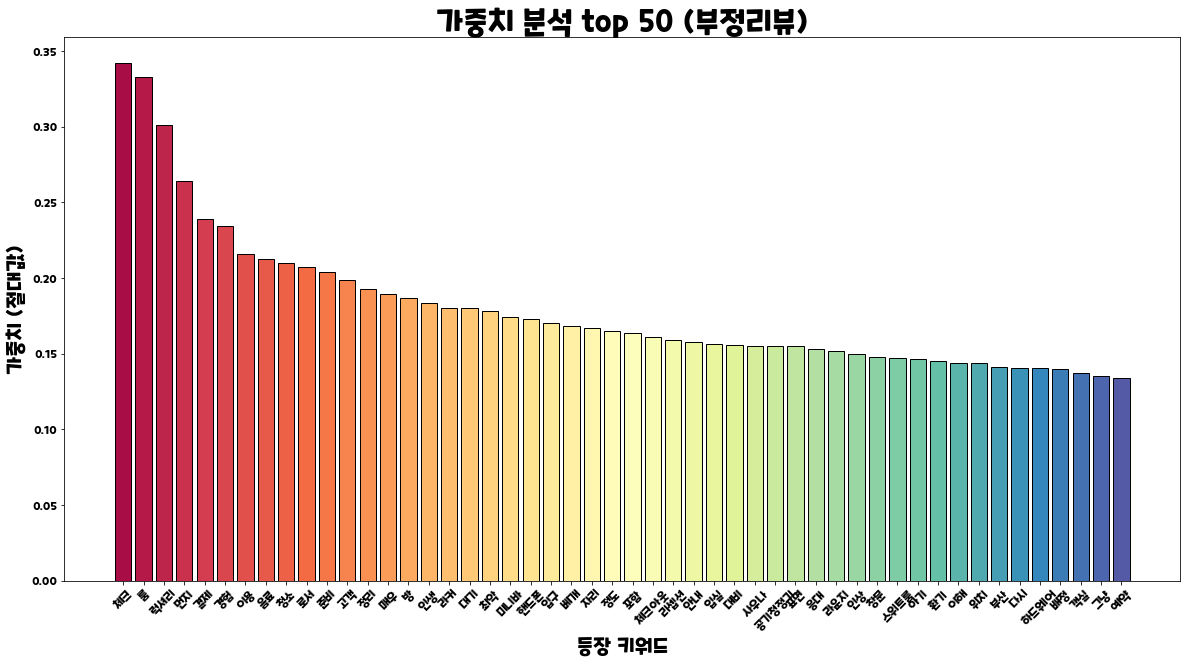

In [46]:
dislikes_tfidf50 = []
count = 0
for x in neg_index[:50]:
  dislikes_tfidf50.append((invert_index_vectorizer[x[1]], abs(x[0])))
plt.figure(figsize = (20, 10))
x = [x for (x, y) in dislikes_tfidf50]
y = [y for (x, y) in dislikes_tfidf50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("가중치 (절대값)",fontproperties=font_label)
plt.title("가중치 분석 top 50 (부정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()